<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Common-Discrete-Distributions" data-toc-modified-id="Common-Discrete-Distributions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Common Discrete Distributions</a></span><ul class="toc-item"><li><span><a href="#Bernoulli-Distributions" data-toc-modified-id="Bernoulli-Distributions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bernoulli Distributions</a></span></li><li><span><a href="#Binomial-Distribution" data-toc-modified-id="Binomial-Distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Binomial Distribution</a></span><ul class="toc-item"><li><span><a href="#Game-Time!" data-toc-modified-id="Game-Time!-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Game Time!</a></span></li><li><span><a href="#But-What's-Real:-Simulation-Time!" data-toc-modified-id="But-What's-Real:-Simulation-Time!-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>But What's <em>Real</em>: Simulation Time!</a></span></li><li><span><a href="#Sidebar:-Probability-of-Probabilities" data-toc-modified-id="Sidebar:-Probability-of-Probabilities-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Sidebar: Probability of Probabilities</a></span></li></ul></li></ul></li><li><span><a href="#Normal-Distribution" data-toc-modified-id="Normal-Distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Normal Distribution</a></span><ul class="toc-item"><li><span><a href="#Standard-Normal-Distribution" data-toc-modified-id="Standard-Normal-Distribution-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Standard Normal Distribution</a></span></li><li><span><a href="#Empirical-Rule" data-toc-modified-id="Empirical-Rule-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Empirical Rule</a></span></li><li><span><a href="#$z$-Score" data-toc-modified-id="$z$-Score-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>$z$-Score</a></span></li></ul></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercises</a></span></li><li><span><a href="#Level-Up:-Poisson-Distribution" data-toc-modified-id="Level-Up:-Poisson-Distribution-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Level Up: Poisson Distribution</a></span></li></ul></div>

# Objectives

* Describe the Bernoulli and Binomial Distributions
* Describe the Normal Distribution and the associated Empirical Rule.

In [2]:
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Common Discrete Distributions

Now that we know a few methods in visualizing distributions 📊👀, we can start looking at different types of distributions.

We can tell a lot about a distribution shape such as taking a guess of the mechanism that it took to generate the data.

## Bernoulli Distributions

The Bernoulli Distribution is the discrete distribution that describes a two-outcome trial, such as a coin toss. The distribution is described by the probability $p$ of one random variable taking the value 1 and by the corrleative probability $q$, associated with 0 and taking the probability 1-p. 

PMF: 
${\displaystyle {\begin{cases}q=1-p&{\text{if }}k=0\\p&{\text{if }}k=1\end{cases}}}$

The simplest example is, once again, a coin flip.  In this scenario, we define either heads or tails as a "success", and assume, if the coin is fair, the probability of success to be .5

![](images/bernouli.png)

Another example would be a penalty kick in soccer.

Let's assume the probability of scoring a goal is .75. Then the Bernoulli Distribution is:

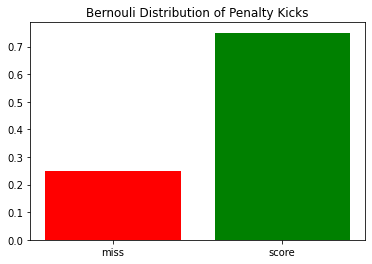

In [3]:
# probability of scoring
p = 0.75

# probability of missing
q = 1 - 0.75

fig, ax = plt.subplots()
ax.bar(['miss', 'score'],[q,p], color=['red','green'])
ax.set_title('Bernouli Distribution of Penalty Kicks');

The expected value is the probability of success, i.e. 0.75.

The variance is:  
$\sigma^2 = (0.75)*(1-0.75) = 0.1875 $

## Binomial Distribution

The Binomial distribution describes the number of successes of a set of Bernoulli trials. For example, say we have an unfair coin with a probability of landing heads of 0.8. If our number of trials is 3, our PMF and CDF would look like what we see below:

![](images/binomial.png)

For the binomial, our Expected Value and Variance can be calculated like so:
- Expected Value
> $E(X) = np$ <br>
- Variance
> $Var(X) = np(1-p)$<br>

If we want to see the probability of a certain number of successes, we use the pmf:

$$\Large f(x) = {n \choose k}p^k(1 - p)^{n - k}$$

Remember: ${n\choose k} = \frac{n!}{k!(n - k)!}$, the number of ways of choosing $k$ objects from a total of $n$.

In our penalty kick example. Suppose we consider a 10-kick set of penalty shots.

The Binomial Distribution can tell me what the probability is that the shootout will result in exactly $k$ goals out of $n$ shots ($k < n$).

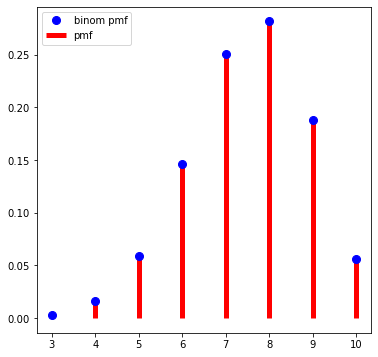

In [4]:
n = 10
p = 0.75
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
x = np.arange(stats.binom.ppf(0.001, n, p),
              stats.binom.ppf(0.999, n, p)+1)

ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), 'r', linewidth=5,
          label='pmf')
ax.legend(loc='best');

### Game Time! 

Let's have a little game! We take a coin and flip it 10 times and see how many times we get heads over tails. Okay, so admittedly that's a boring game for most people (it's no video game). 

* But humoring me, how many times do we expect to see heads in those 10 flips?

> That should be pretty easy to reason. Since we have that handy-dandy equation from above to get $E(x)$ (or simply $np$) and get $10\cdot 0.5 = 5$ for a fair coin!

Let's level up! If we were to play this many times, how often would we expect to see 5 heads? What about 3 heads?

> Well, that's just using the other handy-dandy equation ${n \choose k}p^k(1 - p)^{n - k}$! That's the power of the binomial distribution! Let's plot this out!

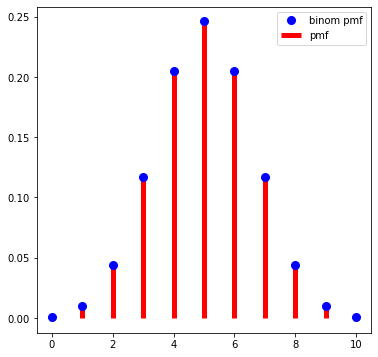

In [5]:
# Plot binomial for fair coin for n=10 flips
n = 10
p = 0.5
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
x = np.arange(0,n+1)

ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), 'r', linewidth=5,
          label='pmf')
ax.legend(loc='best');

Nice! Now I said the coin was fair but if it wasn't? What what that look like for 10 flips? Well, we can plot all that out too!

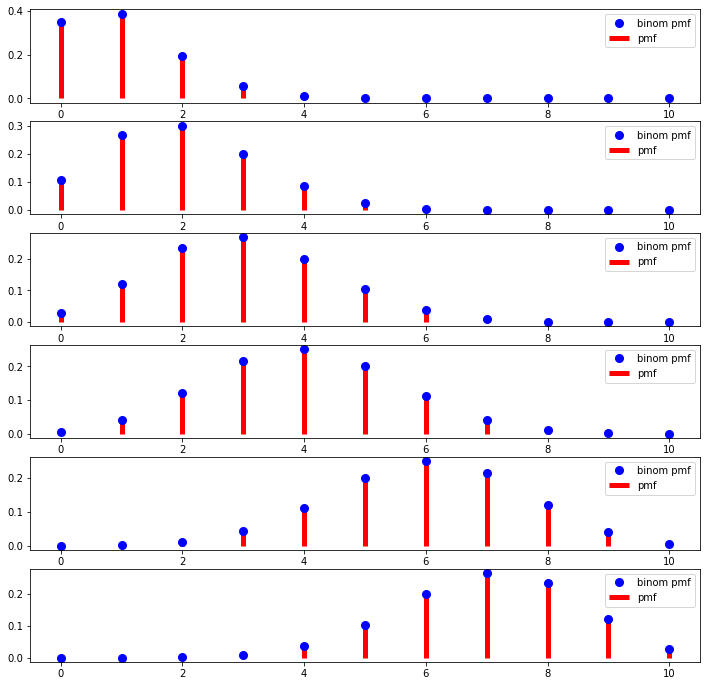

In [6]:
n = 10
ps = np.array([0.1,0.2,0.3,0.4,0.6,0.7])
fig, axs = plt.subplots(ps.shape[0],1, figsize=(12, 12))
x = np.arange(0,11)

for ax,p in zip(axs,ps):
    f_x = stats.binom.pmf(x, n, p)
    ax.plot(x, f_x, 'bo', ms=8, label='binom pmf')
    ax.vlines(x, 0, f_x, 'r', linewidth=5,
              label='pmf')
    ax.legend(loc='best');

### But What's _Real_: Simulation Time!

Turns out some of these can actually just be simulated. Sort of like cheating 😉

Let's start with a scenario where we observe a negative or positive review. We know that there is some probability $p$
in getting a positive review (_success_).

Given a probability of a positive review and how many reviews would we expect to see for a given $N$ reviews?

In [7]:
# Simulate from so many total reviews with a certain probability
def generate_reviews(n_outcomes, true_prob=0.9, n_trials=1):
    '''Success or failure → True or False
    '''
    outcomes_shape = (n_trials, n_outcomes)
    outcomes = np.random.random_sample(size=outcomes_shape) < true_prob
    return outcomes

In [8]:
def num_matching_our_success(N, p, n_trials): 
    # Create a trial of N reviews
    trial = generate_reviews(n_outcomes=N, true_prob=p, n_trials=n_trials)
    # Return number of successes
    success_trial = np.sum(trial,axis=1)
    return success_trial

(0.0, 20.4)

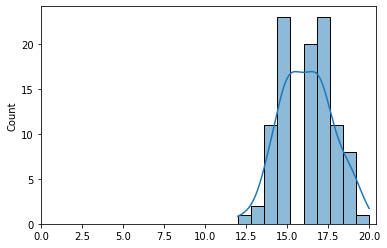

In [11]:
# Number of tries in a trial (observed)
N = 20
p = 0.8

n_trials = 100
counts = num_matching_our_success(N, p, n_trials)
ax = sns.histplot(x=counts, kde=True)
ax.set_xlim(left=0)

### Sidebar: Probability of Probabilities

If we didn't know $p$, we could make a distribution to see what $p$ would best match our observed data!

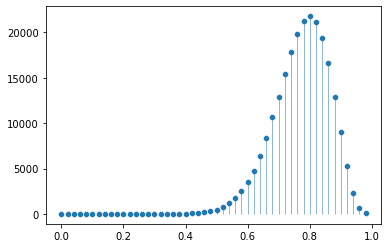

In [12]:
probs = {}
# Number of tries in a trial (observed)
observed_successes, N = 16, 20

n_trials = 100_000

# Define a probability
for p in np.linspace(0,1,50,endpoint=False):
    # Update list: What percent matched our observation
    trial_successes = num_matching_our_success(N, p, n_trials)
    probs[p] = np.sum(trial_successes == observed_successes)
    
sns.scatterplot(x=probs.keys(),y=probs.values())
plt.vlines(probs.keys(),0, probs.values(), linewidth=0.5)

# Normal Distribution

The normal distribution describes many phenomena. Think of anything that has a typical range:
- human body temperatures
- sizes of elephants
- sizes of stars
- populations of cities
- IQ
- heart rate

Among human beings, 98.6 degrees Fahrenheit is an _average_ body temperature. Many folks' temperatures won't measure _exactly_ 98.6 degrees, but most measurements will be _close_. It is much more common to have a body temperature close to 98.6 (whether slightly more or slightly less) than it is to have a body temperature far from 98.6 (whether significantly more or significantly less). This is a hallmark of a normally distributed variable.

Similarly, there are large elephants and there are small elephants, but most elephants are near the average size.

The normal distribution is _very_ common in nature (**Why?**) and will arise often in your work. Get to know it well!

You will recognize it by its characteristic bell curve. 

![normal_curve](images/IQ_normal.png)

You may see the notation 

$N(\mu, \sigma^2)$

where N signifies that the distribution is normal, $\mu$ is the mean, and $\sigma^2$ is the variance.

The PDF of the normal curve is given by:

$\Large f(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left[\frac{-(x - \mu)^2}{2\sigma^2}\right]$

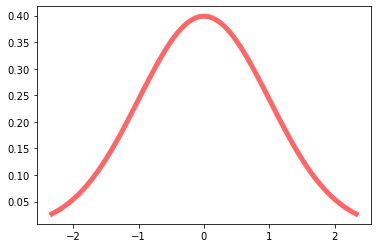

In [13]:
fig, ax = plt.subplots()

mu = 0
sigma = 1
z_curve = np.linspace(stats.norm(mu,sigma).ppf(0.01),
             stats.norm(mu,sigma).ppf(0.99), 100)
ax.plot(z_curve, stats.norm(mu,sigma).pdf(z_curve),
     'r-', lw=5, alpha=0.6, label='z_curve');

![](images/normal_2.png)

## Standard Normal Distribution

A standard normal distribution has a mean of 0 and variance of 1. This is also known as a z distribution. 


![norm_to_z](images/norm_to_z.png)

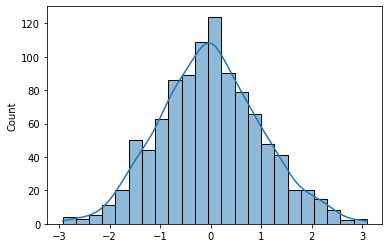

In [14]:
# Let's transform the normal distribtion centered on 5
# with a standard deviation of 2 into a standard normal

normal_dist = np.random.normal(5, 2, 1000)
z_dist = [(x - np.mean(normal_dist))/np.std(normal_dist) 
          for x in normal_dist]

fig, ax = plt.subplots()
sns.histplot(x=z_dist, ax=ax, kde=True);

![](images/empirical_rule.png)

## Empirical Rule

> Rule states that 68% of the values of a normal distribution of data lie within 1 standard deviation of the mean, 95% within 2 stds, and 99.7 within three.  

This makes it really quick to look at a normal distribution and understand where values tend to lie

<img src='https://github.com/learn-co-students/dsc-0-09-12-gaussian-distributions-online-ds-ft-031119/blob/master/normalsd.jpg?raw=true' width=700/>

## $z$-Score

A $z$-score for a data point x (in a normal distribution) is simply the distance to the mean in units of standard deviations. That is:

$z = \frac{x - \mu}{\sigma}$.

By calculating the z-score of an individual point, we can see how unlikely a value is.

Here's a little site with some [interactive Gaussians](https://www.intmath.com/counting-probability/normal-distribution-graph-interactive.php)

# Exercises

1. Consider the distribution of heights of American women, with a mean of 65 inches and a standard deviation of 3.5 inches.

> Calculate the z-score of a height of 75 inches.

2. What type of distribution would describe the following datasets?

    - (a) results of rolling a die 100 times;
    - (b) results of a random number generator;
    - (c) results of random measurements of palm tree heights

3. How would the salaries of New Yorkers likely be distributed?

# Level Up: Poisson Distribution

🎵***That graph is Poisson***🎵

The Poisson distribution describes the probability of a certain number of a specific type of event occuring over a given interval. We assume that these events are probabilistically independent.

Examples:

- number of visitors to a website over an hour
- number of pieces of mail arriving at your door per day over a month
- number of births in a hospital per day

Shape of the Poisson Distribution is governed by the rate parameter **$\lambda$** (lambda):

$\Large\lambda = \frac{Avg\ number\ of\ events}{period\ of\ time}$

Then our Poisson pmf is: ${\displaystyle P(k)= {\frac {\lambda ^{k}e^{-\lambda }}{k!}}}$

Consider the scenario where a website receives 100 hits per hour.

Then we have:

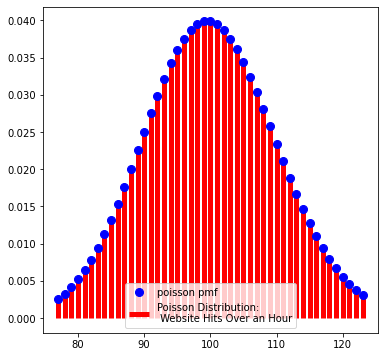

In [15]:
rate = 100

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
x = np.arange(stats.poisson.ppf(0.01, rate),
              stats.poisson.ppf(0.99, rate))

ax.plot(x, stats.poisson(rate).pmf(x), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, stats.poisson(rate).pmf(x), 'r', linewidth=5,
          label='Poisson Distribution:\n Website Hits Over an Hour')
ax.legend(loc='best');

The Poisson distribution has a unique characteristic:
    
$\Large\mu = \sigma^2 = \lambda$

In [16]:
# The area under the curve up to the mean + 1sd
# would be 84% of the total area

stats.poisson.ppf(0.84, 100)

110.0